In [6]:
import numpy as np
import pandas as pd
from scipy import stats

In [8]:
# ML mean Median Mode

speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
Speed_mean = np.mean(speed)
Speed_median = np.median(speed)
speed_mode = stats.mode(speed)

print(f"Speed Mean:{Speed_mean: .2f}")
print(f"Speed Median:{Speed_median}")
print(f"Speed Mode:{speed_mode}")

Speed Mean: 89.77
Speed Median:87.0
Speed Mode:ModeResult(mode=np.int64(86), count=np.int64(3))


In [9]:
# Standard deviation

strd_deviation = np.std(speed)
print(f"Standard Deviation:{strd_deviation: .2f}")

Standard Deviation: 9.26


In [11]:
# Varience

speed_varience = np.var(speed)
print(f"Varience:{speed_varience: .2f}")

print("Square of standard deviation is varience.")
std_sqr = strd_deviation ** 2
print(f" Varience using square of std_deviation {std_sqr: .2f} ")



Varience: 85.72
Square of standard deviation is varience.
 Varience using square of std_deviation  85.72 


In [ ]:
### df.drop(columns=[]): Drops specified columns from the DataFrame.
### df.dropna(subset=[]): Removes rows where specified columns have missing values.
### fillna(): Fills missing values with specified value (e.g., mean).

In [2]:
#Implementation for Data Cleaning

#1. Import Libraries and Load Dataset

import numpy as np
import pandas as pd
import sklearn as skl

df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/titanic.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Step 2: Check for Duplicate Rows

df.duplicated().sum()

np.int64(0)

In [3]:
# Step 3: Identify Column Data Types

cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print(f"Categorical columns: {cat_col}")
print(f"Numerical columns: {num_col} ")

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 


In [ ]:
# Step 4: Count Unique Values in the Categorical Columns
df[cat_col].nunique()

,0
Name,889
Sex,2
Ticket,680
Cabin,146
Embarked,3


In [ ]:
# Calculate Missing Values

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Step 6: Drop Irrelevant or Data-Heavy Missing Columns

df1 = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df.dropna(subset=['Embarked'], inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)


/tmp/ipython-input-1076427387.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df1.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


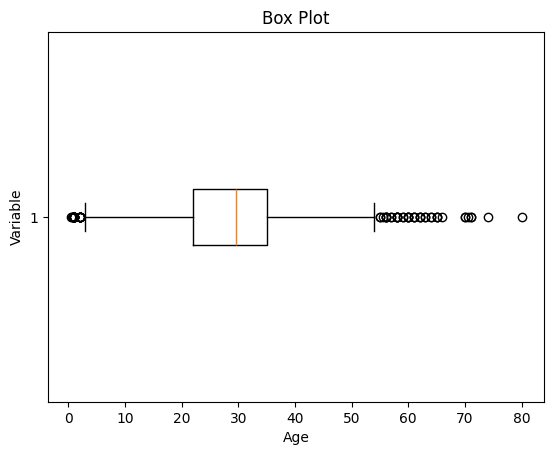

In [ ]:
# Step 7: Detect Outliers with Box Plot
import matplotlib.pyplot as plt

plt.boxplot(df['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [ ]:
# Step 8: Calculate Outlier Boundaries and Remove Them

mean = df1['Age'].mean()
std = df1['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

In [ ]:
# 9.Impute Missing Data Again if Any

df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# Step 10: Recalculate Outlier Bounds and Remove Outliers from the Updated Data

mean = df3['Age'].mean()
std = df3['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

df1.head()

Lower Bound : 8.978989004171481
Upper Bound : 49.30395961288911


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
x = df3[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']]
y = df3['Survived']

In [ ]:
# Step 12: Data formatting

   # 1. Min-Max Scaling
   # 2. Standard Deviation


In [ ]:
def selection_sort(data):
    # Traverse through all array elements
    for i in range(len(data)):
        # Find the minimum element in remaining unsorted array
        min_idx = i
        for j in range(i + 1, len(data)):
            if data[min_idx] > data[j]:
                min_idx = j

        # Swap the found minimum element with the first element
        data[i], data[min_idx] = data[min_idx], data[i]
    return data

# Example usage:
my_list = [64, 34, 25, 12, 22, 11, 90]
sorted_list = selection_sort(my_list.copy()) # Use a copy to keep the original list
print("Original list:", my_list)
print("Sorted list:", sorted_list)

Original list: [64, 34, 25, 12, 22, 11, 90]
Sorted list: [11, 12, 22, 25, 34, 64, 90]
